In [23]:
import cv2
import numpy as np
import pygame

import hashlib
import base64

from matplotlib import pyplot
import IPython.display as display
from PIL import Image

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 16]

In [2]:
from io import BytesIO

def display_pil_image(image):
    b = BytesIO()
    image.save(b, format='png')
    data = b.getvalue()

    ip_img = display.Image(data=data, format='png', embed=True)

    display.clear_output(wait=True)
    display.display(ip_img)

In [65]:
def cleanup(image):
    binary_output = np.zeros_like(image)
    binary_output[image >= 5] = 1
    return binary_output

def h6(w):
    h = hashlib.md5(cleanup(w)).digest()
    return base64.b64encode(h)[:6].lower().decode("utf-8")

In [66]:
def getGamebox(image):
    (x, y, x1, y1) = GAMEBOX
    return image[x:x1, y:y1]

In [70]:
def overlayText(image, text, location, size=3, weight=8, color=(255,255,255)):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, text, location, font, size, color, weight)
    return image

In [74]:
def process(image):
    im2, contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in enumerate(contours):
        (x,y,w,h) = cv2.boundingRect(contour[1])
        if h > 15:
            digest = h6(image[y:y+h, x:x+w])
            overlayText(image, digest, (x-10, y-10), 0.5, 1)
            cv2.rectangle(image, (x,y), (x+w,y+h), (255, 255, 255), 2)
                
    return image

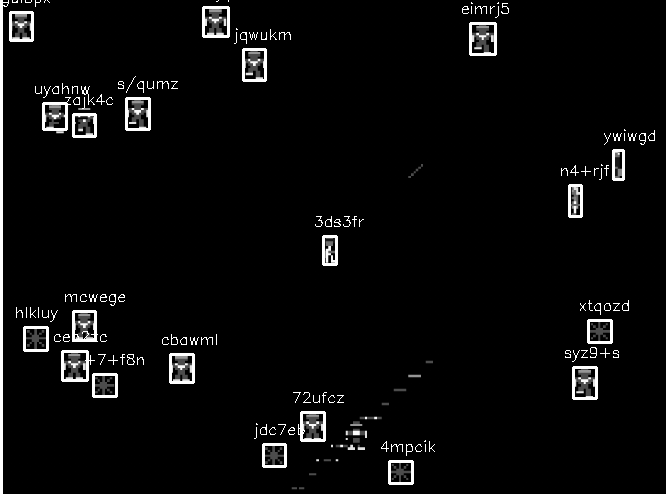

In [76]:
GAMEBOX = [114, 309, 608, 975]

cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)

i = 0
while True:    
    ret, image = cap.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gamebox = getGamebox(gray)
    processed = process(gamebox)
    rgb = Image.fromarray(processed, "L")
    display_pil_image(rgb)
    
    i += 1
    if i > 1:
        break
        
cap.release()